**Segmentação baseada em bordas**

Realizar a segmentação das imagens baseada nas bordas da imagem. Detectando onde ocorre mudanças repentinas na iluminação.

Bordas: Mudança intensa nos pixels de uma imagem
- Idependentes da iluminação: Tonalidade do objeto irá mudar;
- Fáceis de detectar computacionalmente;
- Usadas para determinar características de nível e complexidade maiores (linhas, curvas, cantos etc);
- Etapa fundamental de pré-processamento para técnicas de visão computacional mais avançadas.

A utilização da detecção de bordas reduz a necessidade de etapas mais avançadas de pré-processamento das imagens.

* Filtro passa-alta -> usado para a detecção de bordas

* Filtro passa-baixa -> usado para o desfoque da imagem

**Operador de sobel**

Utiliza dois kernels para realizar o cálcula das derivadas. Onde, um filtro é utilizado para calcular mudanças na horizontal da imagem e outro para mudanças verticais na imagem.

Kernel para mudanças horizontais:

|-1 0 1|

|-2 0 2|

|-1 0 1|

Kernel para mudanças verticais:

|-1 -2 -1|

|0 0 0|

|1 2 1|

Depois deve-se juntar a detecção horizontal e a vertical

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

from google.colab.patches import cv2_imshow

from google.colab import drive

drive.mount('/content/gdrive')

!cp -R /content/gdrive/MyDrive/Mestrado/Cursos\ -\ Udemy/Segmentação\ de\ imagens/Segmentação\ Imagens\ Python\ AZ/imagens imagens/ 

Mounted at /content/gdrive


In [2]:
def mostrar_imagem(imagem):
  fig = plt.gcf() # Limpa as configurações do gráfico
  fig.set_size_inches(18, 6)
  plt.imshow(imagem, cmap='gray')
  plt.axis('off')
  plt.show()

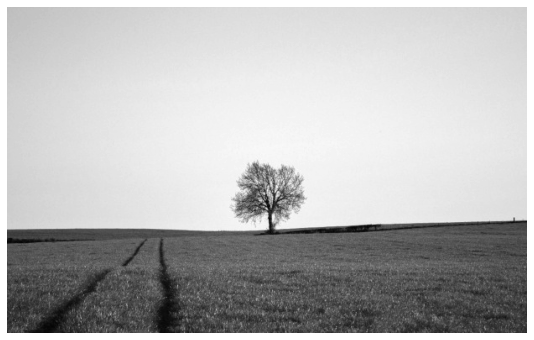

In [17]:
img = cv2.imread('/content/imagens/paisagem01.jpg')
imgCinza = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
mostrar_imagem(imgCinza)

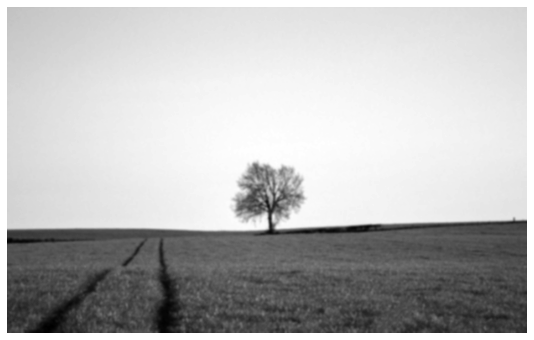

In [18]:
desfoque = cv2.GaussianBlur(imgCinza, (5,5), 0) # Diminui o ruído
mostrar_imagem(desfoque)

**Definindo manualmente as matrizes**

In [19]:
k_sobelX = np.array(([-1,0,1],
                     [-2,0,2],
                     [-1,0,1]), np.float32) # Horizontal
k_sobelY = np.array(([-1,-2,-1],
                     [0,0,0],
                     [1,2,1]), np.float32) # Vertical

In [20]:
sobel_x = cv2.filter2D(desfoque, cv2.CV_64F, # Profundidade da imagem, 64F é o valor padrão
                           k_sobelX)
sobel_y = cv2.filter2D(desfoque, cv2.CV_64F, k_sobelY)

**Maneira mais fácil**

In [22]:
sobel_x = cv2.Sobel(desfoque, cv2.CV_64F, 1, 0, # Direção do cálculo da derivada, 1,0 -> direção X
                     ksize = 3)
sobel_y = cv2.Sobel(desfoque, cv2.CV_64F, 0, 1, # Direção do cálculo da derivada, 0,1 -> direção y 
                    ksize = 3)

In [23]:
# Convertendo para inteiro [0,255]
sobel_x = cv2.convertScaleAbs(sobel_x)
sobel_y = cv2.convertScaleAbs(sobel_y)

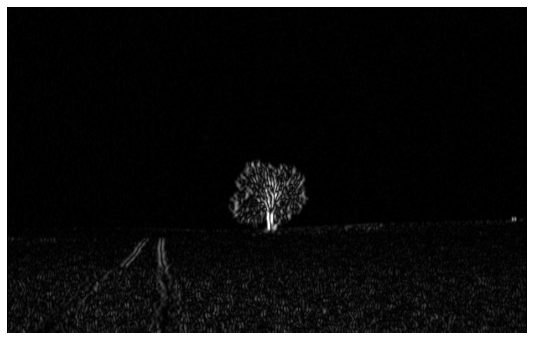

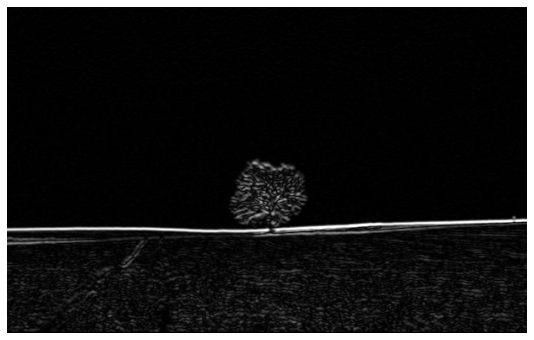

In [25]:
mostrar_imagem(sobel_x)
mostrar_imagem(sobel_y)

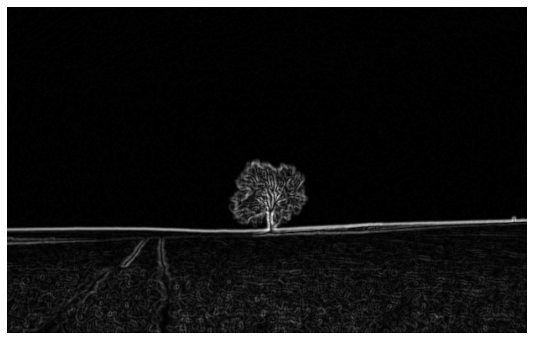

In [26]:
# concatenando os dois valores
sobel = cv2.addWeighted(src1 = sobel_x, alpha=0.5, src2 = sobel_y, beta = 0.5, gamma = 0.0) # Beta e alfa -> parâmetros relacionados ao peso de cada imagem na soma das duas imagens. Ao auimentá-los aumentá-se as bordas da imagem
# gamma parâmetro relacionado ao brilho da imagem
mostrar_imagem(sobel)